In [18]:
import numpy
# Подключим библиотеку с function expit()
import scipy.special
# библа для графики
import matplotlib.pyplot
%matplotlib inline

In [19]:
# Нейронная сеть
class neuralNetwork:  
    # инициализация сети 
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # инициализация скрытого слоя, входных и выходных значений
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # инициализация весов
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # обучающий коэффициент
        self.lr = learningrate
        
        # функция активация
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # тренерующая функция
    def train(self, inputs_list, targets_list):
        # преобразование в двумерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # вычисление  входного сигнала
        hidden_inputs = numpy.dot(self.wih, inputs)
        # подсчет функции активации
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # вычисление  выходного сигнала
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # подсчет функции активации
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # обновление весов обратного распространения
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # обновление весов обратного распространения скрытого слоя
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # запрос к сети
    def query(self, inputs_list):
        # конвертировать в 2д
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # вычисление  входного сигнала
        hidden_inputs = numpy.dot(self.wih, inputs)
        # подсчет функции активации
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # вычисление  выходного сигнала
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # подсчет функции активации
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [20]:
# Число входных значений
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# коэф обучения
learning_rate = 0.1

# создание нейронной сетки
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [21]:
# загрузка данных
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [22]:
# тренировка нейронной сети

# число тренировок
epochs = 5

for e in range(epochs):
    # пройти тренировочные данные
    for record in training_data_list:
        # разбиение по ,
        all_values = record.split(',')
        # скалирование чисел
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создание значений со сдвигом
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [23]:
# загрузить тестовые данные
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [24]:
all_values = test_data_list[1].split(',')

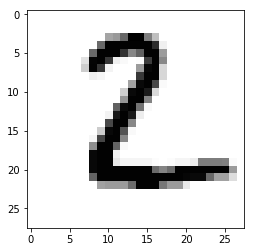

In [25]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

In [26]:
 # приводим данные к нормальному виду
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[3.19825530e-03],
       [1.43003079e-02],
       [9.55045282e-01],
       [4.29234484e-02],
       [5.78709911e-04],
       [1.29260872e-03],
       [1.04305093e-01],
       [3.68051152e-04],
       [1.21526572e-03],
       [7.51286750e-06]])

In [27]:
# тестирование нейронной сети

# показатель того насколько хорошо работает сеть пустой
scorecard = []

# показатель того, насколько хорошо работает сеть, изначально пустой
for record in test_data_list:
    # разбиение по ,
    all_values = record.split(',')
    # данные для коррекция ответов
    correct_label = int(all_values[0])
    # скалирование данных
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # запрос к сети
    outputs = n.query(inputs)
    # вывести
    label = numpy.argmax(outputs)
    print("Предсказуемое число  ", label)
    print("Тестируемое число  ",correct_label)
    # append correct or incorrect to list
    if (label == correct_label):
        # если правильно 
        scorecard.append(1)
    else:
        # не правильно 
        scorecard.append(0)
        pass
    
    pass

Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемо

Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   4
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   0
Тестируемое число   6
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   7
Тестируемо

Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемо

Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   2
Тестируемо

Предсказуемое число   8
Тестируемое число   7
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   2
Тестируемо

Тестируемое число   8
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   2
Тестируемое число   2
Предсказуемо

Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   3
Тестируемое число   9
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   0
Тестируемое число   8
Предсказуемое число   7
Тестируемо

Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   6
Тестируемо

Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   5
Тестируемое число   6
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   7
Тестируемо

Тестируемое число   4
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   5
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   0
Тестируемое число   0
Предсказуемо

Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   4
Тестируемое число   9
Предсказуемое число   5
Тестируемое число   6
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   4
Тестируемо

Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   3
Тестируемо

Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемо

Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   5
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   5
Тестируемое число   8
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   4
Тестируемо

Тестируемое число   5
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   8
Тестируемое число   2
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   6
Тестируемое число   6
Предсказуемо

Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   8
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   0
Тестируемо

Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   3
Тестируемо

Тестируемое число   1
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   4
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   9
Тестируемое число   9
Предсказуемо

Тестируемое число   4
Предсказуемое число   0
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   4
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   0
Тестируемое число   0
Предсказуемо

Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   4
Тестируемо

Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   6
Тестируемое число   1
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   2
Тестируемо

Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   9
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   3
Тестируемо

Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   4
Тестируемое число   7
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   7
Тестируемо

Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   0
Тестируемо

Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   2
Предсказуемое число   4
Тестируемое число   5
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   1
Тестируемо

Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   8
Тестируемо

Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   3
Тестируемое число   3
Предсказуемо

Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемо

Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   5
Тестируемо

Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   6
Тестируемое число   5
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   9
Тестируемо

Предсказуемое число   4
Тестируемое число   6
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемо

Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   8
Тестируемо

Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   8
Тестируемо

Тестируемое число   8
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемо

Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   2
Тестируемо

Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   5
Тестируемо

Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   8
Тестируемое число   8
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   9
Тестируемое число   9
Предсказуемое число   5
Тестируемое число   5
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   7
Тестируемое число   7
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   0
Тестируемое число   0
Предсказуемое число   4
Тестируемое число   4
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   6
Тестируемое число   6
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   1
Тестируемое число   1
Предсказуемое число   3
Тестируемое число   3
Предсказуемое число   2
Тестируемое число   2
Предсказуемое число   1
Тестируемо

In [28]:
# вычислить оценку эффективности, долю правильных ответов
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9693


In [ ]:
print(scorecard)